# Imports

In [5]:
import numpy as np
import scipy
from scipy.spatial import distance
from matplotlib import pyplot as plt

# Utility Functions

In [2]:
# Define our kernel function (the exponentiated quadratic)
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

def

In [74]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
   
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1.T
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

# Problem Parameters

In [72]:
# Set parameters for the training/testing split
#
# n_x_training - Number of points to condition on (training points)
# n2 - Number of points in posterior (test points)
# ny - Number of functions that will be sampled from the posterior

  
n2 = 75
ny = 5
domain = (-6, 6)

# Generate 10 datapoints for X and Y to serve as training data
X1 = np.random.uniform(domain[0], domain[1], size=(10, 1))


# Create the training data by generating values for X and Y
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = np.sin(X1)

# Create the testing data
#     Note: linspace returns a 1D rowvector, which we will reshape into a 2D column vector
#           This would basically be a transpose if we were dealing with a 2D rowvector
#
X2 = np.linspace(domain[0], domain[1], 80).reshape(-1, 1)

# Training

In [81]:
# Calculate the variance and covariance matrix
Σ11 = exponentiated_quadratic(X1, X1)
Σ12 = exponentiated_quadratic(X1, X2)
Σ21 = Σ12.T
Σ22 = exponentiated_quadratic(X2, X2)

In [80]:
# Calculate the conditional mean
solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
μ2 = solved @ y1

In [107]:
μ2.T[0]

array([-0.51848964, -0.75108118, -1.05849819, -1.45052621, -1.93166504,
       -2.49805258, -3.13451596, -3.81243153, -4.48918181, -5.10994012,
       -5.61223944, -5.93328538, -6.01931537, -5.83562073, -5.37531943,
       -4.66478907, -3.76397914, -2.76064865, -1.75879796, -0.86292533,
       -0.16089394,  0.29119015,  0.47883773,  0.43146699,  0.21636964,
       -0.07460834, -0.34303858, -0.50290528, -0.4968285 , -0.30639867,
        0.04517629,  0.49830079,  0.968771  ,  1.36366693,  1.59838737,
        1.61191307,  1.37790671,  0.91006885,  0.26108744, -0.48458503,
       -1.22309086, -1.84695364, -2.26206934, -2.40338118, -2.24671604,
       -1.81463798, -1.17496595, -0.43175286,  0.29013647,  0.86444421,
        1.18363386,  1.1761209 ,  0.81749975,  0.13378021, -0.80378491,
       -1.89105461, -3.00797033, -4.03683874, -4.87862653, -5.46465704,
       -5.76225716, -5.77421926, -5.53310536, -5.09219596, -4.51516887,
       -3.86641143, -3.20335449, -2.57154768, -2.0025484 , -1.51

In [99]:
print("{0} - {1} : {2}".format(solved.shape, y1.shape, μ2.shape))


(80, 8) - (8, 1) : (80, 1)


In [82]:
# Compute the conditional covariance
Σ2 = Σ22 - (solved @ Σ12)

# Testing

In [109]:
# Simulate the random variable and generate samples
#     Note: The formula expects a 1D rowvector so we will transform μ2
y2 = np.random.multivariate_normal(mean=μ2.T[0], cov=Σ2, size=5)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


# Plotting

In [110]:
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


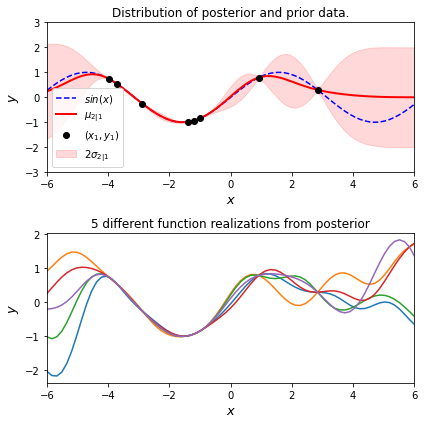

In [15]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#